<a href="https://colab.research.google.com/github/Mrinal18/Siraj_Tutorial/blob/master/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from datetime import timedelta
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
 

# Load the stock prices dataset into a dataframe and check the top 5 rows
!pip install yfinance --upgrade --no-cache-dir
from google.colab import drive
drive.mount('drive', force_remount =True)


#df = pd.read_csv("GOOG.csv", parse_dates=[0])
#df.head()


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)
Mounted at drive


In [176]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

yf.pdr_override()
try:
  df =  pdr.get_data_yahoo('GOOG',start= '2018-01-01').reset_index()
except ValueError:  #raised if `y` is empty.
    pass

df.to_csv('GOOG.csv', index = False)
df.set_index('Date', inplace=True)
df.head()


[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [177]:
# Check the shape and datatypes of the stock prices dataframe
print(df.shape)
print(df.dtypes)


(419, 6)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [178]:
minmax = MinMaxScaler().fit(df.iloc[:, 5:6].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 5:6].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.101049
1,0.135890
2,0.058900
3,0.108556
4,0.066679


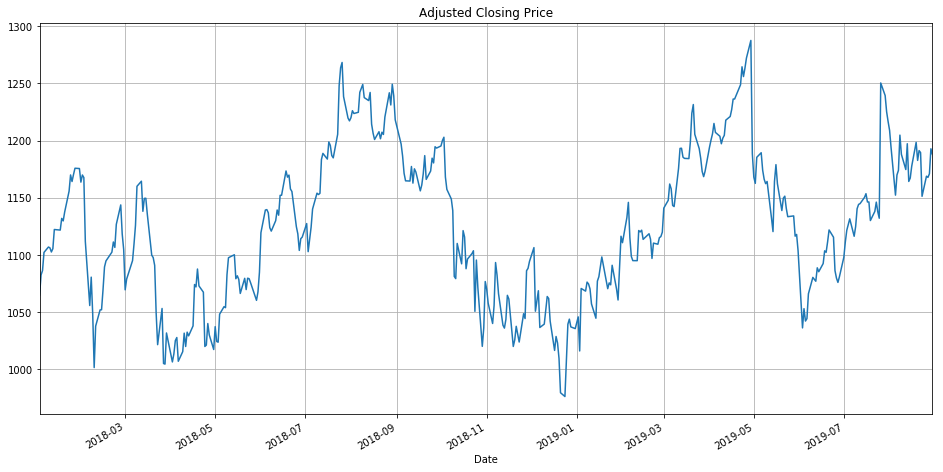

In [179]:
df['Adj Close'].plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [0]:
window_size = 32 

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices] 

In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [183]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

print(X_train.shape[1])

32


**Linear Model**


In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model.

Step 1: Load the preprocessed data

In [0]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import tree


from sklearn.linear_model import LassoLarsCV
Lasso_las_CV_model = LassoLarsCV()
Lasso_las_CV_model.fit(X_train, y_train)

# Infer
y_pred_train_Lasso_las_CV = Lasso_las_CV_model.predict(X_train)
y_pred_Lasso_las_CV = Lasso_las_CV_model.predict(X_test)

#model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
#model.fit(X_train, y_train)
#model.score(X_test,y_test)



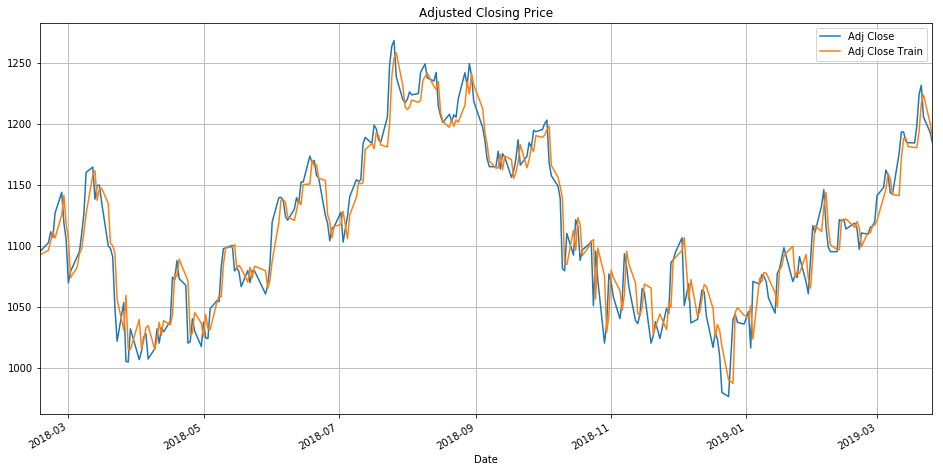

In [185]:
df_LLC = df.copy()
df_LLC.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_LLC = df_LLC.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_LLC['Adj Close Train'] = y_pred_train_Lasso_las_CV[:-window_size]
df_LLC.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)

**Orthogonal Matching Pursuit model (OMP)**

In [0]:
from sklearn.linear_model import OrthogonalMatchingPursuit
OMP_model = OrthogonalMatchingPursuit()
OMP_model.fit(X_train, y_train)

# Infer
y_pred_train_OMP_model = OMP_model.predict(X_train)
y_pred_OMP_model = OMP_model.predict(X_test)

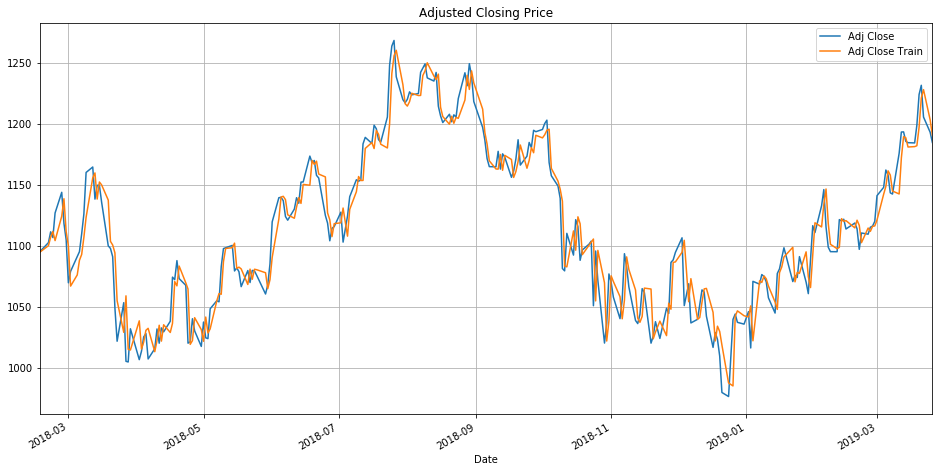

In [187]:
df_OMP = df.copy()
df_OMP.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_OMP = df_OMP.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_OMP['Adj Close Train'] = y_pred_train_OMP_model[:-window_size]
df_OMP.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)

**ensemble-based methods**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Infer
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

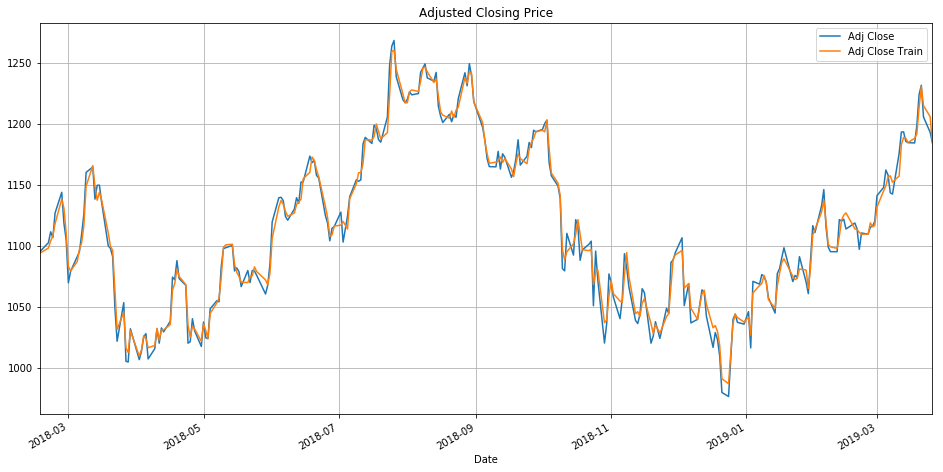

In [189]:
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)


In [190]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model_BR = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model_BR.fit(X_train, y_train)

y_pred_train_BR = model_BR.predict(X_train)
y_pred_BR = model_BR.predict(X_test)
print(len(y_pred_train_BR))

309


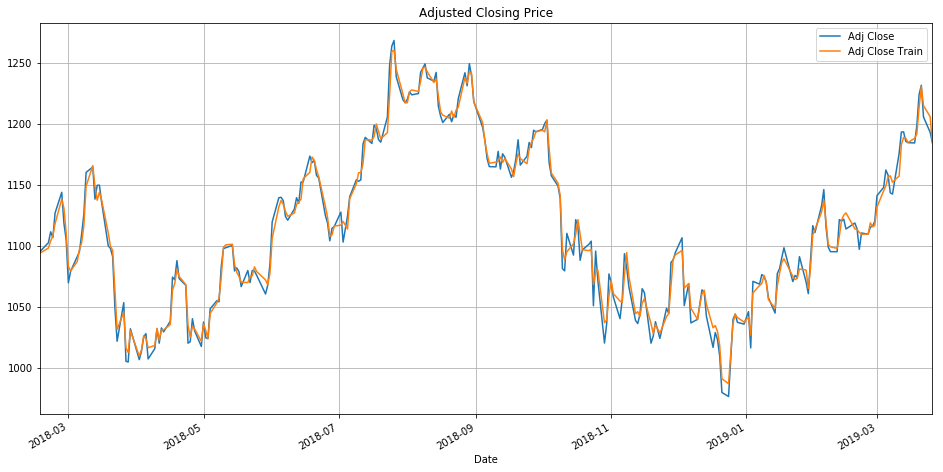

In [191]:
df_br = df.copy()
df_br.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_br = df_br.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_br['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_br.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)


**Neural Network**

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import plot_partial_dependence

est = MLPRegressor()
est.fit(X_train, y_train)
logistic_mlp = MLPRegressor(activation='logistic') #using a different activation function 
logistic_mlp.fit(X_train, y_train)

y_pred_train_MLP = est.predict(X_train)
y_pred_MLP = est.predict(X_test)


y_pred_train_log = logistic_mlp.predict(X_train)
y_pred_log = logistic_mlp.predict(X_test)


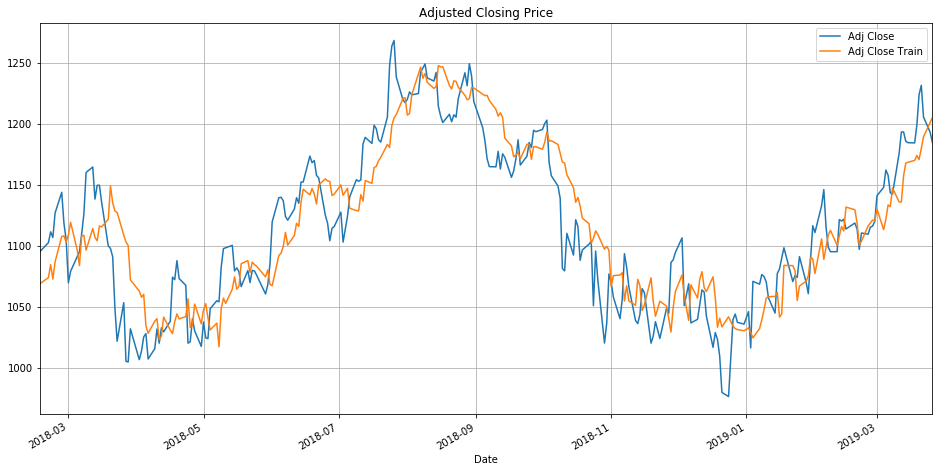

In [230]:
df_mlp = df.copy()
df_mlp.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_mlp = df_mlp.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_mlp['Adj Close Train'] = y_pred_train_MLP[:-window_size]
df_mlp.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)


**RNN **

In [208]:
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

#Preprocssing of the data
scl = MinMaxScaler()
#Scale the data
cl = df['Adj Close']
cl = cl.values[:,None]
cl = scl.fit_transform(cl)


def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
  

X,y = processData(cl,window_size)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

data_transform = scaler.fit_transform(df['Adj Close'].values[:,None])
data_transform = data_transform[indices]
X2 = data_transform[:,:-1]
y2 = data_transform[:,-1]
X_train_reshape = X2[:ind_split]
y_train_reshape = y2[:ind_split]
X_test_reshape = X2[ind_split:]
y_test_reshape = y2[ind_split:]


308
78
308
78


In [221]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(window_size,1), return_sequences=True))
model.add(LSTM(256))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 


X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))


#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 308 samples, validate on 78 samples
Epoch 1/300
308/308 [==============================] - 9s 30ms/step - loss: 0.1476 - val_loss: 0.1167
Epoch 2/300
308/308 [==============================] - 2s 8ms/step - loss: 0.0707 - val_loss: 0.0185
Epoch 3/300
308/308 [==============================] - 2s 7ms/step - loss: 0.0332 - val_loss: 0.0344
Epoch 4/300
308/308 [==============================] - 2s 7ms/step - loss: 0.0256 - val_loss: 0.0111
Epoch 5/300
308/308 [==============================] - 2s 8ms/step - loss: 0.0169 - val_loss: 0.0105
Epoch 6/300
308/308 [==============================] - 2s 7ms/step - loss: 0.0136 - val_loss: 0.0103
Epoch 7/300
308/308 [==============================] - 2s 8ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 8/300
308/308 [==============================] - 2s 8ms/step - loss: 0.0111 - val_loss: 0.0096
Epoch 9/300
308/308 [==============================] - 2s 7ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 10/300
308/308 [=======================

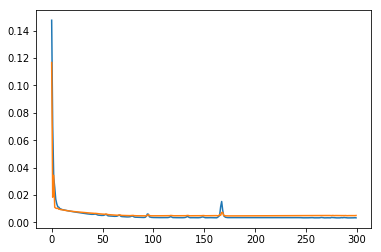

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
y_pred_train_keras = scaler.inverse_transform(model.predict(X_train_reshape, batch_size=256))
y_pred_keras = scaler.inverse_transform(model.predict(X_test_reshape, batch_size=256))

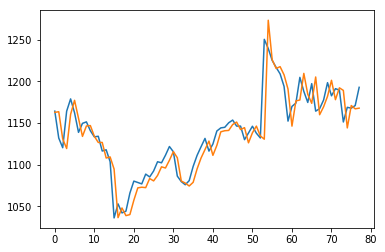

In [224]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))

plt.plot(scl.inverse_transform(Xt))



In [225]:


act = []
pred = []
#for i in range(77):
i = 2
Xt = model.predict(X_test[i].reshape(1,window_size,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[1131.0559]], actual:[[1120.439941]]


In [0]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

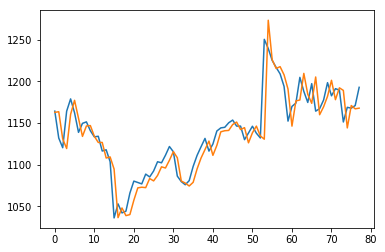

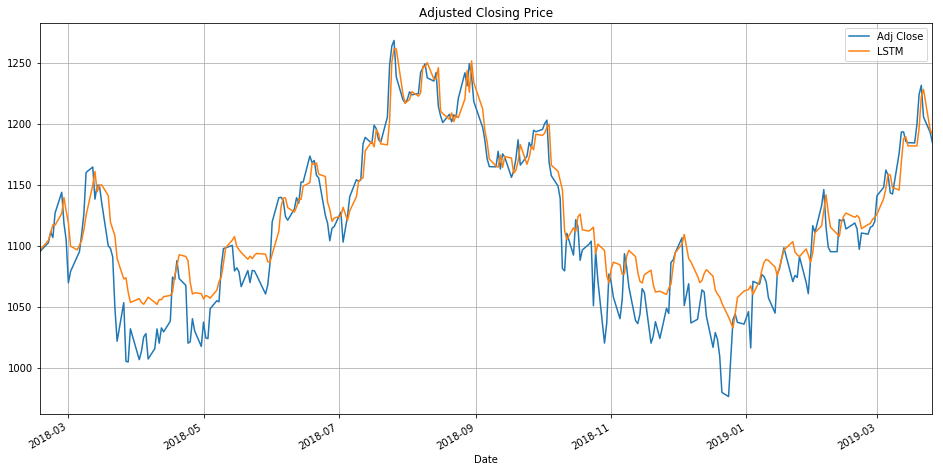

In [227]:
#predicting the values
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

#for the training part
df_lstm = df.copy()
df_lstm.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lstm = df_lstm.iloc[window_size:ind_split]
df_lstm['LSTM'] = y_pred_train_keras[:-window_size]
df_lstm.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

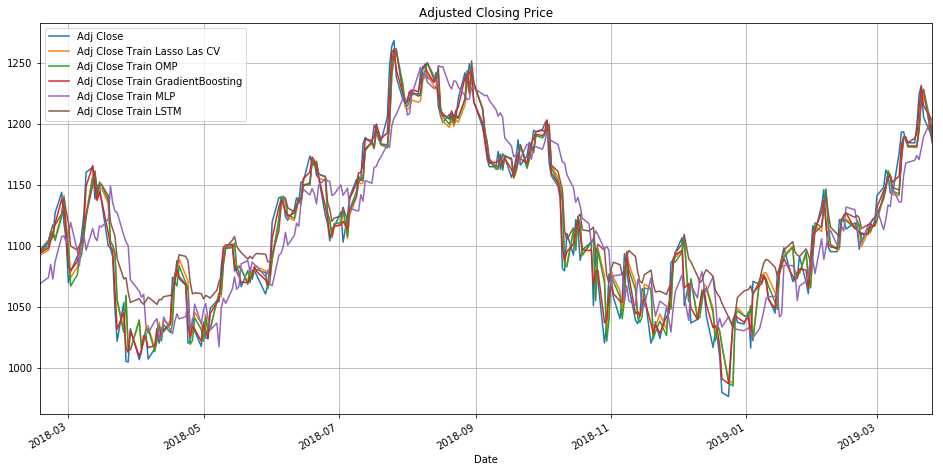

In [229]:
#Collective graph for training


df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split] # Past 32 days we don't know yet
# Add in all of our methods
df_train['Adj Close Train Lasso Las CV'] = y_pred_train_Lasso_las_CV[:-window_size]
df_train['Adj Close Train OMP'] = y_pred_train_OMP_model[:-window_size]
df_train['Adj Close Train GradientBoosting'] = y_pred_train_gb[:-window_size]
df_train['Adj Close Train MLP'] = y_pred_train_MLP[:-window_size]
df_train['Adj Close Train LSTM'] = y_pred_train_keras[:-window_size]
# Plot the data now
df_train.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)
#


**We will Test our data now**


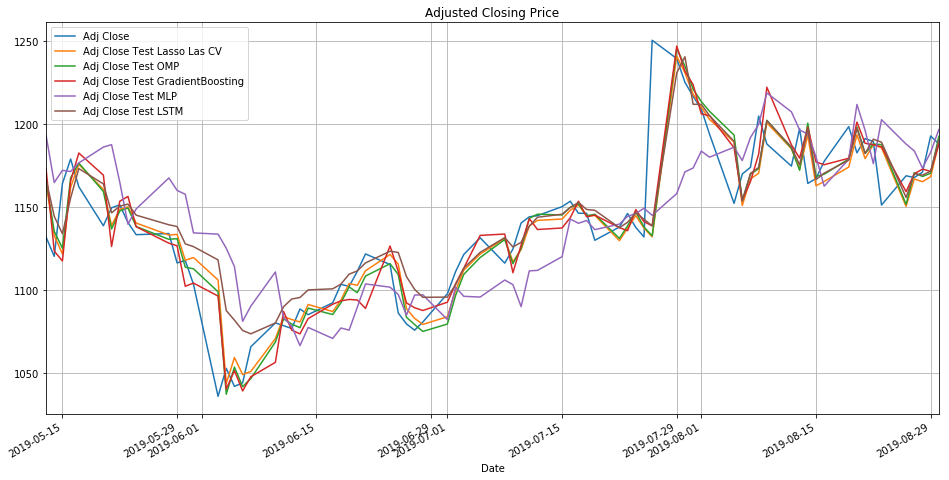

In [239]:
#Collective graph for testing


df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] 
# Add in all of our methods
df_test['Adj Close Test Lasso Las CV'] = y_pred_Lasso_las_CV
df_test['Adj Close Test OMP'] = y_pred_OMP_model
df_test['Adj Close Test GradientBoosting'] = y_pred_gb
df_test['Adj Close Test MLP'] = y_pred_MLP
df_test['Adj Close Test LSTM'] = y_pred_keras
# Plot the data now
df_test.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)
#

We see that MLP is the only one which doesn't perform well in this case